In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = r'C:\Users\SanthoshS\Desktop\DataEngineering\DataWarehouse\curated_schema\curated.csv'
df = pd.read_csv(df)

In [25]:
# Drop duplicates in place
df.drop_duplicates(inplace=True)

In [26]:
# Calculate the sum of null values for each column
nulls_per_column = df.isnull().sum()
print("Null values per column:\n", nulls_per_column)

Null values per column:
 enrollment_id       0
employee_id         0
course_id           0
enrolled_date       0
completed_date      0
progress            0
ratings             0
category            0
course_name         0
course_duration     0
price               0
outcome_skill       0
role_outcome        0
employee_name       0
current_role        0
skills              0
dateofbirth         0
dateofjoining       0
email               0
mobile_number       0
Address             0
yearofexperience    0
dtype: int64


## Exploratory Data Analysis

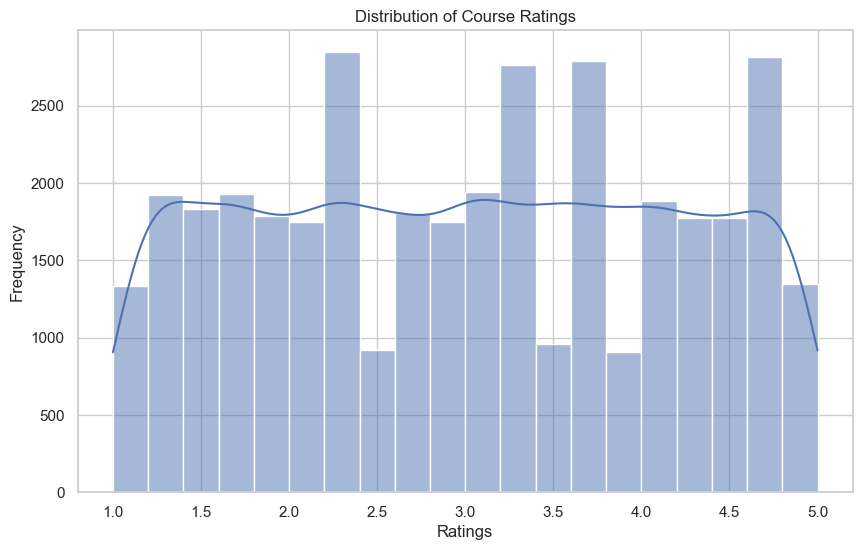

In [27]:
# Set up the style for plots
sns.set(style="whitegrid")

# 1. Distribution of Course Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

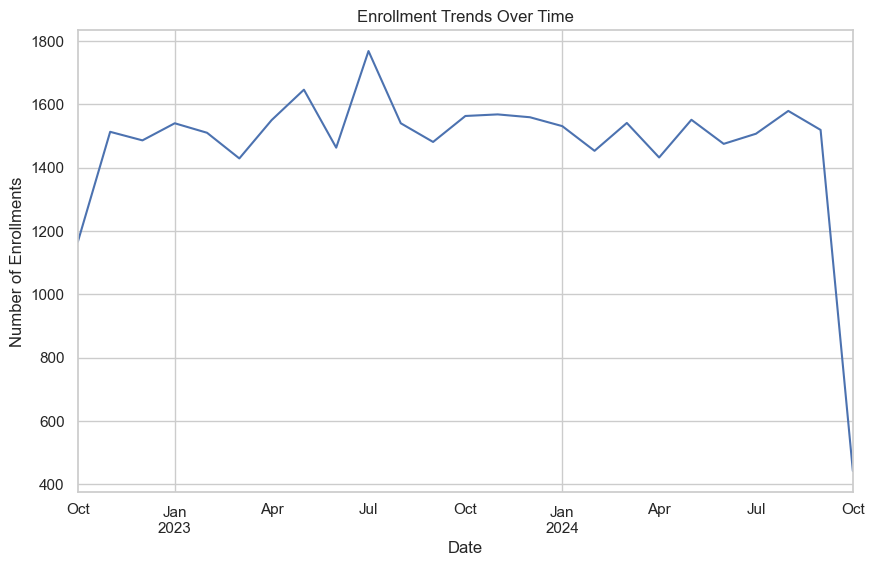

In [28]:
# 2. Enrollment Trends Over Time
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])
enrollment_trends = df.groupby(df['enrolled_date'].dt.to_period('M')).size()
plt.figure(figsize=(10, 6))
enrollment_trends.plot()
plt.title('Enrollment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Enrollments')
plt.show()

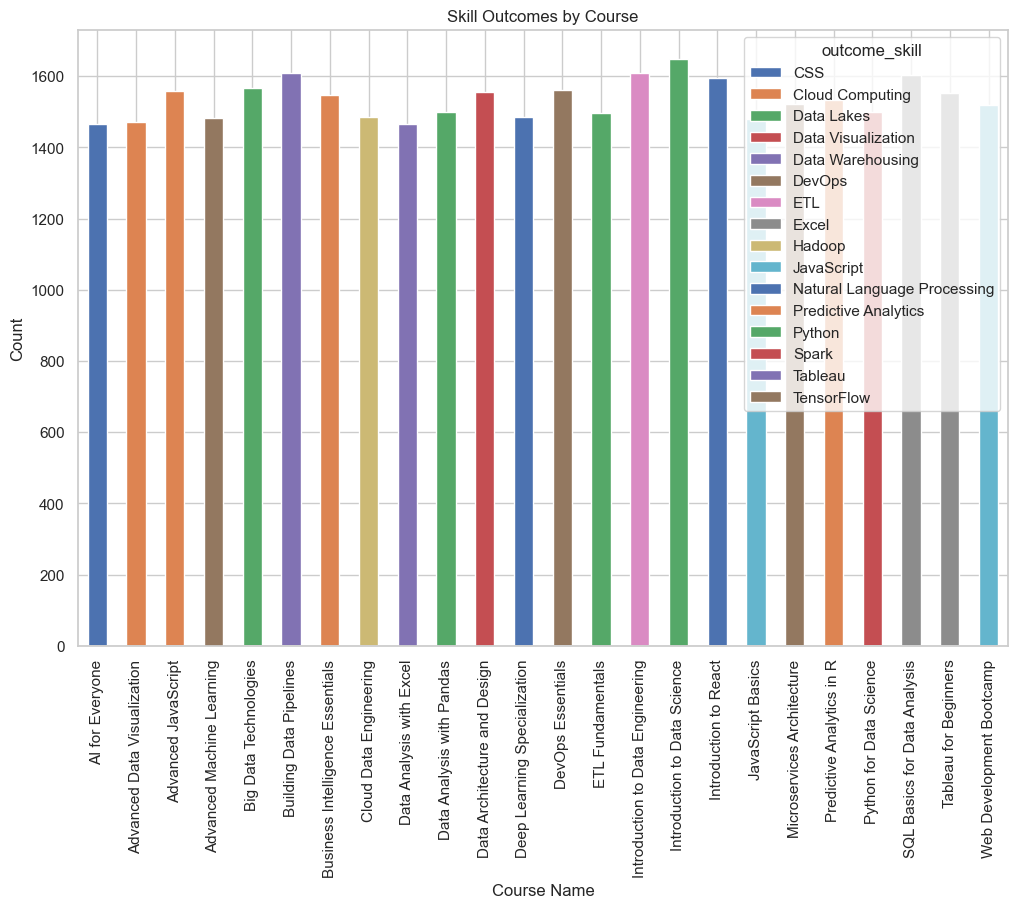

In [29]:
# 3. Skill Outcomes by Course
outcome_counts = df.groupby('course_name')['outcome_skill'].value_counts().unstack()
outcome_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Skill Outcomes by Course')
plt.xlabel('Course Name')
plt.ylabel('Count')
plt.show()

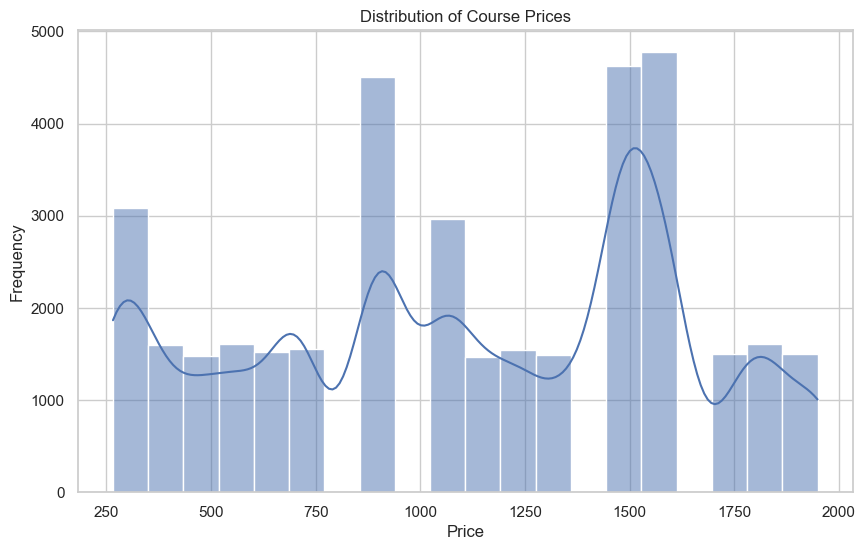

In [30]:
# 4. Course Prices Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

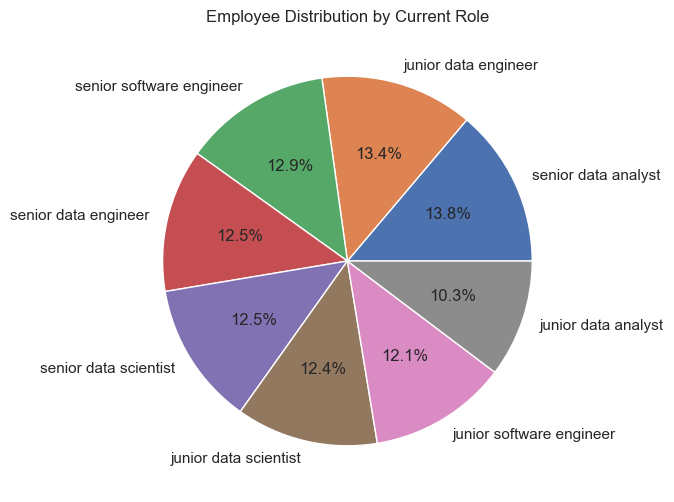

In [31]:
# 5. Employee Demographics
plt.figure(figsize=(10, 6))
df['current_role'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Employee Distribution by Current Role')
plt.ylabel('')
plt.show()


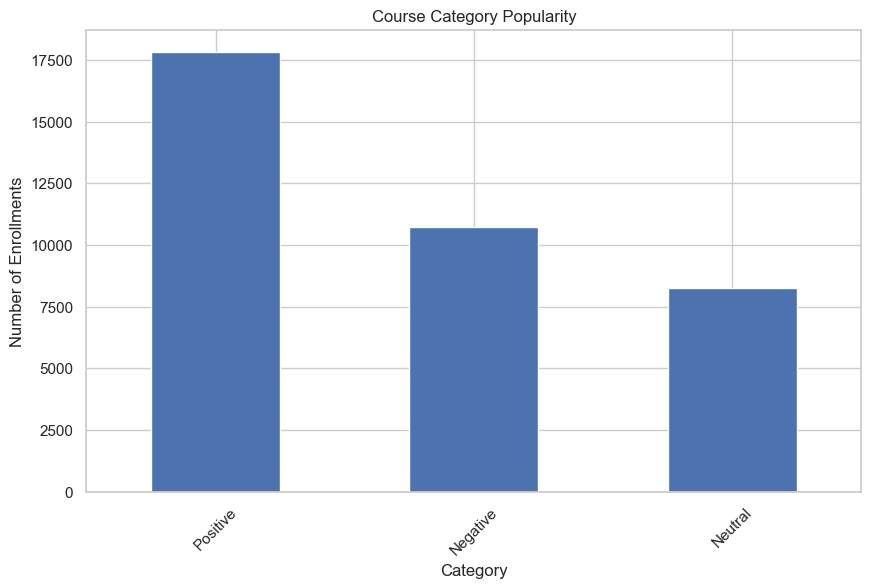

In [32]:
# 6. Course Category Popularity
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Course Category Popularity')
plt.xlabel('Category')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.show()

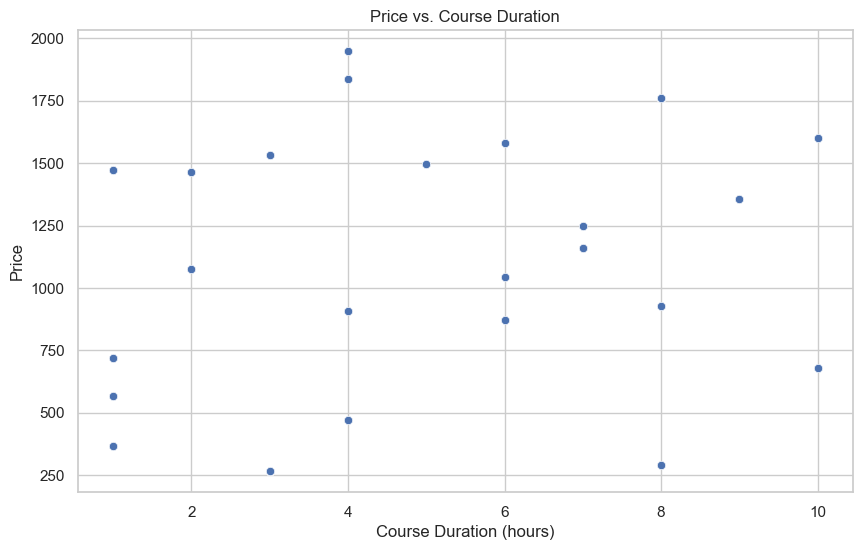

In [33]:
# 7. Price vs Course Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='course_duration', y='price', data=df)
plt.title('Price vs. Course Duration')
plt.xlabel('Course Duration (hours)')
plt.ylabel('Price')
plt.show()
